In [15]:
# 앞으로 사용하게 될 라이브러리들을 모두 불러오기.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline

from scipy.stats import norm
from scipy import stats

from sklearn.linear_model import RidgeCV

import warnings
warnings.filterwarnings(action='ignore')

%matplotlib inline

# train과 test 데이터 세트 불러오기.
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

# train에서 상관계수가 0.5 이상인 피처들 추출하기.
corr_house = train.corr()
top_corr_features = corr_house.index[abs(corr_house["SalePrice"])>=0.5]
top_corr_features

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')

In [5]:
subset=train[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice']]
       
y = subset['SalePrice']
X = subset.drop(['SalePrice'], axis=1)

reg=LinearRegression()
reg.fit(X,y)

y_train_error = reg.predict(X)
rmse=(np.sqrt(mean_squared_error(y, y_train_error)))

print("RMSE is {}".format(rmse))

RMSE is 37779.24578021317


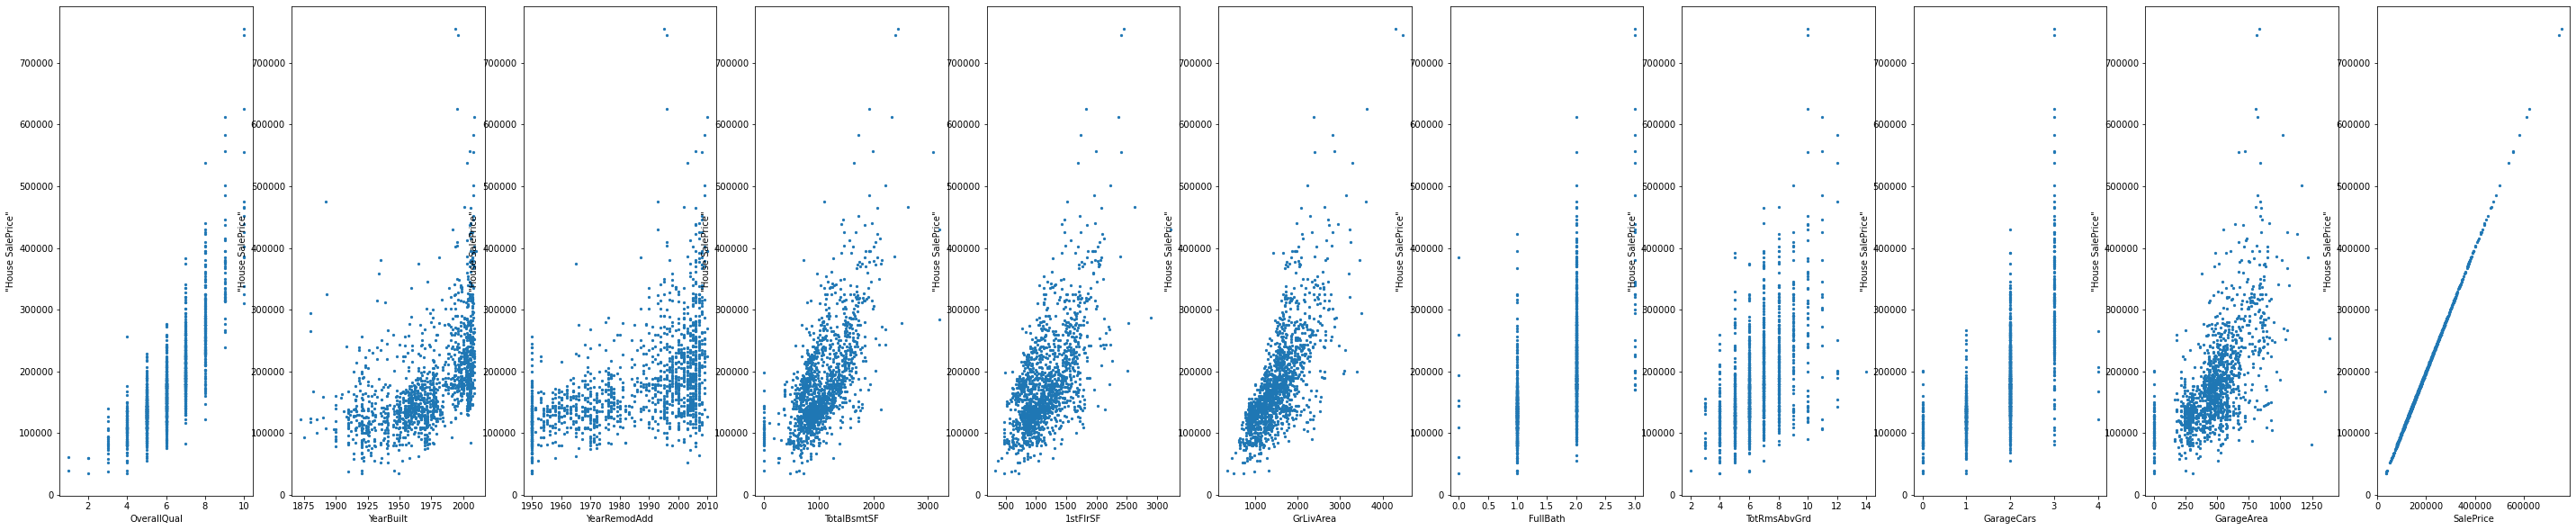

In [7]:
plt.figure(figsize=(50,10))
target = train['SalePrice']

for i, col in enumerate(top_corr_features):
    plt.subplot(1, len(top_corr_features), i+1)
    x = train[col]
    y = target
    plt.scatter(x,y,marker='o',s=5)
    plt.xlabel(col)
    plt.ylabel('"House SalePrice"')

In [6]:
# 아웃라이어 처리하기(1).
train = train.drop(train[train['Id'] == 1299].index)
train = train.drop(train[train['Id'] == 524].index)

In [8]:
# 아웃라이어 처리하기(2)
train = train.drop(train[train['Id'] == 582].index)
train = train.drop(train[train['Id'] == 1191].index)
train = train.drop(train[train['Id'] == 1062].index)

In [9]:
subset=train[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice']]
       
y = subset['SalePrice']
X = subset.drop(['SalePrice'], axis=1)

reg=LinearRegression()
reg.fit(X,y)

y_train_error = reg.predict(X)
rmse=(np.sqrt(mean_squared_error(y, y_train_error)))

print("RMSE is {}".format(rmse))

RMSE is 33552.9607780025


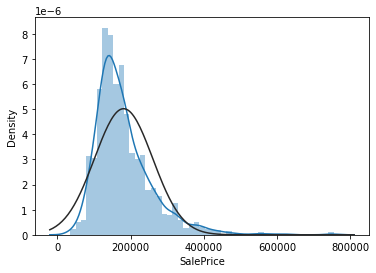

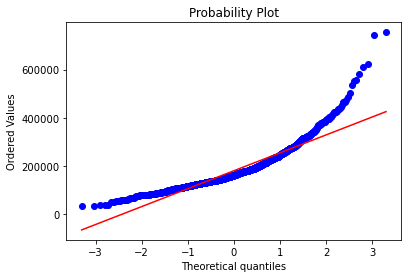

In [17]:
sns.distplot(train['SalePrice'] , fit=norm); #distplot은 분포에 대한 히스토그램을 만들어준다.
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show();

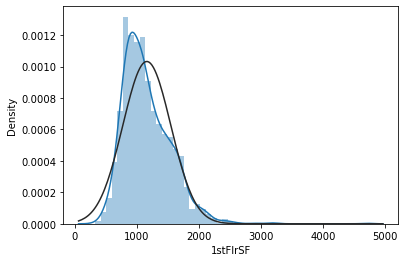

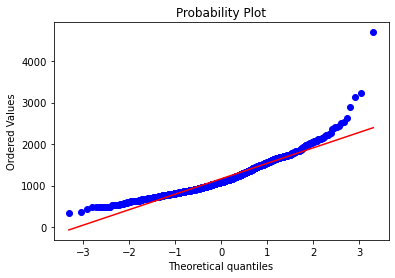

In [18]:
sns.distplot(train['1stFlrSF'] , fit=norm); #distplot은 분포에 대한 히스토그램을 만들어준다.
fig = plt.figure()
res = stats.probplot(train['1stFlrSF'], plot=plt)
plt.show();

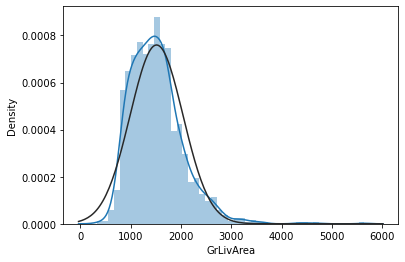

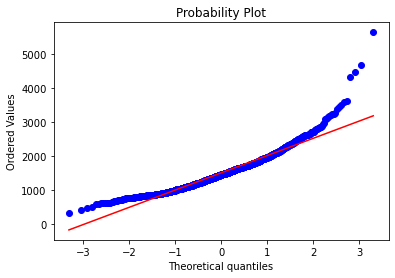

In [19]:
sns.distplot(train['GrLivArea'] , fit=norm); #distplot은 분포에 대한 히스토그램을 만들어준다.
fig = plt.figure()
res = stats.probplot(train['GrLivArea'], plot=plt)
plt.show();

In [20]:
# 3가지 피처, 'SalePrice', '1stFlrSF', 'GrLivArea'에 대해
# log 스케일로 바꾼다.
train["SalePrice"] = np.log1p(train["SalePrice"])
#test["SalePrice"] = np.log1p(test["SalePrice"])

train["1stFlrSF"] = np.log1p(train["1stFlrSF"])
test["1stFlrSF"] = np.log1p(test["1stFlrSF"])

train["GrLivArea"] = np.log1p(train["GrLivArea"])
test["GrLivArea"] = np.log1p(test["GrLivArea"])

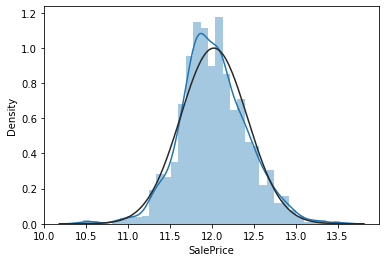

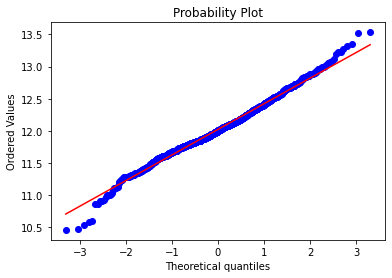

In [21]:
sns.distplot(train['SalePrice'] , fit=norm); #distplot은 분포에 대한 히스토그램을 만들어준다.
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show();

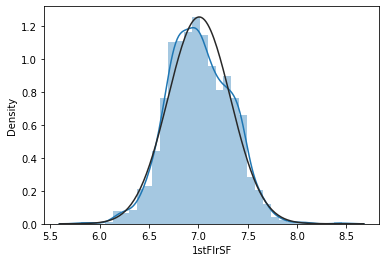

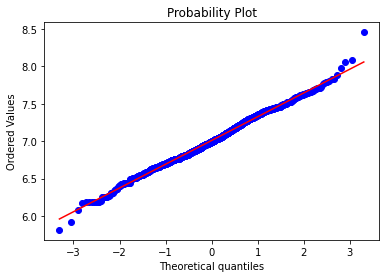

In [22]:
sns.distplot(train['1stFlrSF'] , fit=norm); #distplot은 분포에 대한 히스토그램을 만들어준다.
fig = plt.figure()
res = stats.probplot(train['1stFlrSF'], plot=plt)
plt.show();

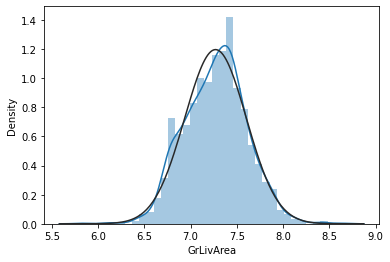

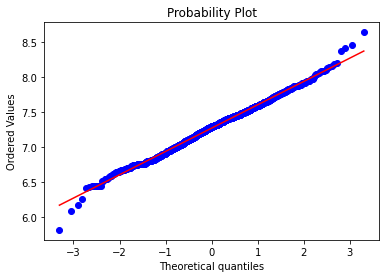

In [23]:
sns.distplot(train['GrLivArea'] , fit=norm); #distplot은 분포에 대한 히스토그램을 만들어준다.
fig = plt.figure()
res = stats.probplot(train['GrLivArea'], plot=plt)
plt.show();

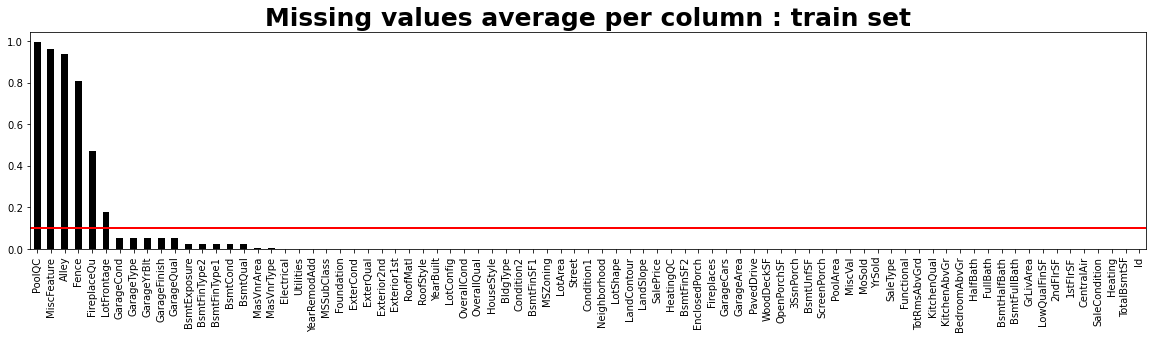

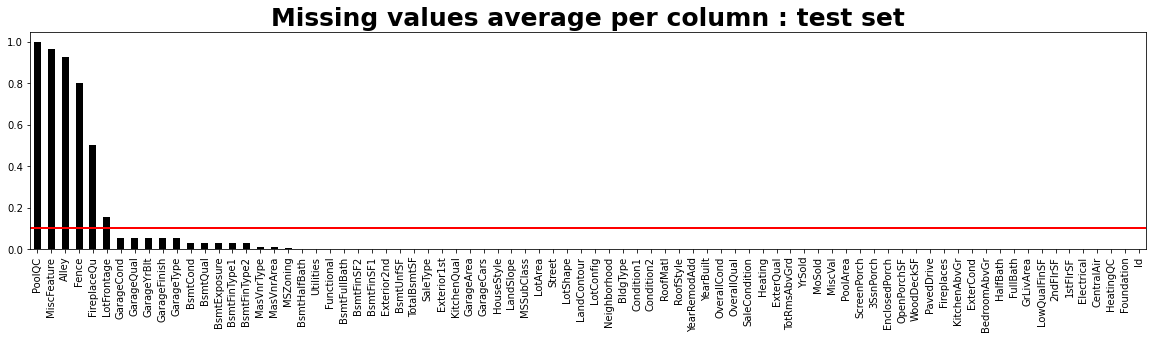

In [38]:
allna = (train.isnull().sum() / len(train))
#allna = allna.drop(allna[allna == 0].index).sort_values(ascending=False)
allna = allna.sort_values(ascending=False)
plt.figure(figsize=(20, 4))
allna.plot.bar(color="black")
plt.title('Missing values average per column : train set', fontsize=25, weight='bold' )
plt.axhline(0.1, 0, 1, color='red', linestyle='solid', linewidth=2)
plt.show()

allna = (test.isnull().sum() / len(test))
#allna = allna.drop(allna[allna == 0].index).sort_values(ascending=False)
allna = allna.sort_values(ascending=False)
plt.figure(figsize=(20, 4))
allna.plot.bar(color="black")
plt.title('Missing values average per column : test set', fontsize=25, weight='bold' )
plt.axhline(0.1, 0, 1, color='red', linestyle='solid', linewidth=2)
plt.show()

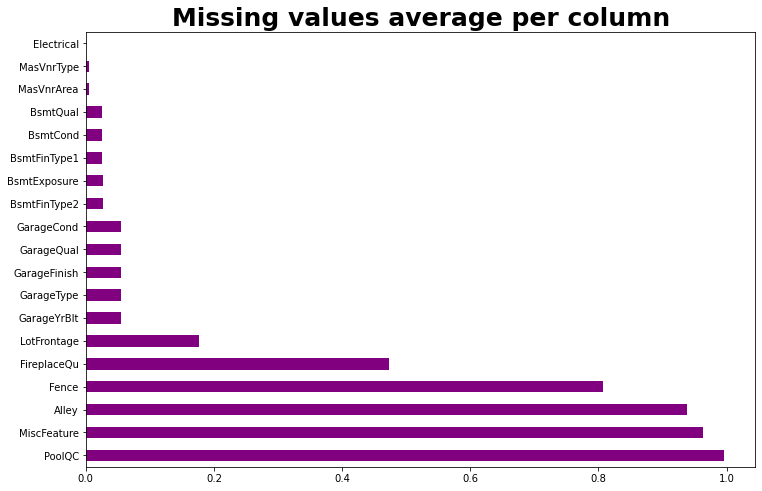

In [25]:
allna = (train.isnull().sum() / len(train))
allna = allna.drop(allna[allna == 0].index).sort_values(ascending=False)
plt.figure(figsize=(12, 8))
allna.plot.barh(color='purple')
plt.title('Missing values average per column', fontsize=25, weight='bold' )
plt.show()

In [41]:
#nan 값 처리를 train과 test 파일에 걸쳐서 하기 위해 concat으로 합쳐준다.
# 이때 나중에 다시 나눠야하기 때문에 train의 길이를 저장한다.

# train 데이터의 행 개수 추출
len_train = train.shape[0]

# train과 test 데이터의 'SalePrice' 피처 추출
y_reg = train['SalePrice']

# test 데이터의 인덱스(1461부터 2919) 추출
Id = test['Id']

# train과 test 데이터 병합
df_all = pd.concat([train,test])

# train과 test 데이터에 있던 인덱스 제거
del df_all['Id']

In [43]:
# In these features, NAN means none
# nan 처리!

# 손실된 데이터가 너무 많은(몇 % 이상) 피처들을 아예 제거하기.
# (제거한 근거를 그래프로 제시하면 매우 좋겠음!)
df_all = df_all.drop(['PoolQC'], axis=1)
df_all = df_all.drop(['MiscFeature'], axis=1)
df_all = df_all.drop(['Fence'], axis=1)
df_all = df_all.drop(['FireplaceQu'], axis=1)
df_all = df_all.drop(['LotFrontage'], axis=1)

# 문자형 피처들의 손실된 데이터를 'None'으로 채우기 / 지하실, 차고가 NaN 보다는 없는 게 더 자연스러움
df_all["Alley"] = df_all["Alley"].fillna("None")
df_all['BsmtQual'] = df_all['BsmtQual'].fillna('None')
df_all['BsmtCond'] = df_all['BsmtCond'].fillna('None')
df_all['BsmtExposure'] = df_all['BsmtExposure'].fillna('None')
df_all['BsmtFinType1'] = df_all['BsmtFinType1'].fillna('None')
df_all['BsmtFinType2'] = df_all['BsmtFinType2'].fillna('None')
df_all['GarageType'] = df_all['GarageType'].fillna('None')
df_all['GarageFinish'] = df_all['GarageFinish'].fillna('None')
df_all['GarageQual'] = df_all['GarageQual'].fillna('None')
df_all['GarageCond'] = df_all['GarageCond'].fillna('None')

# 숫자형 피처들의 손실된 데이터를 0으로 채우기 / 지하실, 차고가 NaN 보다는 없는 게 더 자연스러움
df_all['BsmtFinSF1'] = df_all['BsmtFinSF1'].fillna(0)
df_all['BsmtFinSF2'] = df_all['BsmtFinSF2'].fillna(0)
df_all['BsmtUnfSF'] = df_all['BsmtUnfSF'].fillna(0)
df_all['TotalBsmtSF'] = df_all['TotalBsmtSF'].fillna(0)
df_all['BsmtFullBath'] = df_all['BsmtFullBath'].fillna(0)
df_all['BsmtHalfBath'] = df_all['BsmtHalfBath'].fillna(0)
df_all['MasVnrArea'] = df_all['MasVnrArea'].fillna(0)
df_all['GarageYrBlt'] = df_all['GarageYrBlt'].fillna(0)
df_all['GarageCars'] = df_all['GarageCars'].fillna(0)
df_all['GarageArea'] = df_all['GarageArea'].fillna(0)

# 당연히 있어야 하는 손실된 데이터를 평균값(?)으로 채우기
df_all['MSZoning'] = df_all['MSZoning'].fillna(df_all['MSZoning'].mode()[0])
df_all['Exterior1st'] = df_all['Exterior1st'].fillna(df_all['Exterior1st'].mode()[0])
df_all['Exterior2nd'] = df_all['Exterior2nd'].fillna(df_all['Exterior2nd'].mode()[0])
df_all['MasVnrType'] = df_all['MasVnrType'].fillna(df_all['MasVnrType'].mode()[0])
df_all['Electrical'] = df_all['Electrical'].fillna(df_all['Electrical'].mode()[0])
df_all['KitchenQual'] = df_all['KitchenQual'].fillna(df_all['KitchenQual'].mode()[0])
df_all['Functional'] = df_all['Functional'].fillna(df_all['Functional'].mode()[0])
df_all['SaleType'] = df_all['SaleType'].fillna(df_all['SaleType'].mode()[0])